# <span style = "color: green" >Simple Linear Regression Project (Gold Price Prediction) </span>

***

Of all the precious metals, gold is the most popular as an investment. Investors generally buy gold as a way of diversifying risk, especially through the use of futures contracts and derivatives. The gold market is subject to speculation and volatility as are other markets. Compared to other precious metals used for investment, gold has been the most effective safe haven across a number of countries.<br><br>
The Dataset contain gold prices (in USD) from 2001 to 2019.
Our goal is to predict where the gold prices will be in the coming years

#### Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read 'gold_price_usd.csv' & store it in a variable

In [2]:
df = pd.read_csv('gold_price_usd.csv')

#### View the first 5 rows

In [3]:
df.head()

,Date,USD (AM)
0,2001-01-02,272.80
1,2001-01-03,269.00
2,2001-01-04,268.75
3,2001-01-05,268.00
4,2001-01-08,268.60


#### Check the information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4718 non-null   object 
 1   USD (AM)  4718 non-null   float64
dtypes: float64(1), object(1)
memory usage: 73.8+ KB


#### Find the columns

In [5]:
df.columns


Index(['Date', 'USD (AM)'], dtype='object')

#### Rename USD (AM) to Price

In [6]:
df= df.rename(columns= {'USD (AM)': 'Price'})
df.head()

,Date,Price
0,2001-01-02,272.80
1,2001-01-03,269.00
2,2001-01-04,268.75
3,2001-01-05,268.00
4,2001-01-08,268.60


#### Check if there are any missing values in the dataset

In [7]:
df.isnull().sum()

Date     0
Price    0
dtype: int64

#### Gather the basic statistical information about the dataset

In [8]:
df.describe()

,Price
count,4718.000000
mean,959.990812
std,449.456217
min,256.700000
25%,449.112500
50%,1113.125000
75%,1293.750000
max,1896.500000


#### Convert Date column from object to datetime format

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0      2001-01-02
1      2001-01-03
2      2001-01-04
3      2001-01-05
4      2001-01-08
          ...    
4713   2019-08-27
4714   2019-08-28
4715   2019-08-29
4716   2019-08-30
4717   2019-09-02
Name: Date, Length: 4718, dtype: datetime64[ns]

#### Create a new column with Year

In [10]:
df['Year'] = df['Date'].dt.year
df.head()

,Date,Price,Year
0,2001-01-02,272.80,2001
1,2001-01-03,269.00,2001
2,2001-01-04,268.75,2001
3,2001-01-05,268.00,2001
4,2001-01-08,268.60,2001


#### Create a new column with Months

In [11]:
df['Month'] = df['Date'].dt.month

In [12]:
df.head()

,Date,Price,Year,Month
0,2001-01-02,272.80,2001,1
1,2001-01-03,269.00,2001,1
2,2001-01-04,268.75,2001,1
3,2001-01-05,268.00,2001,1
4,2001-01-08,268.60,2001,1


#### See all the years and Months in our dataset

In [9]:
df['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [26]:
#Months
df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

## <span style = "color: orange" >Visualization</span>

### Create a regression plot with x-axis as years and y-axis as Price

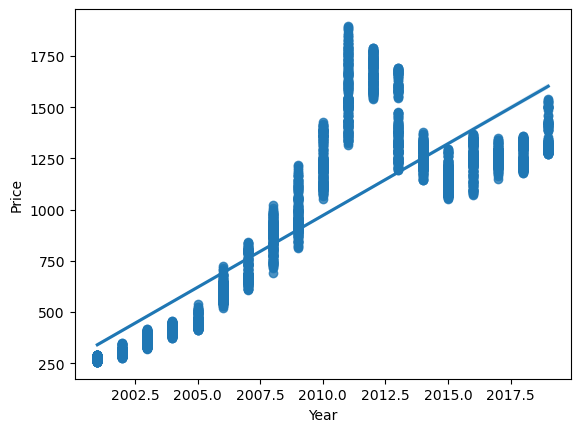

In [10]:
sns.regplot(x='Year', y='Price', data=df)
plt.show()

### Plot a histplot to find the variation in price

<AxesSubplot:xlabel='Price', ylabel='Count'>

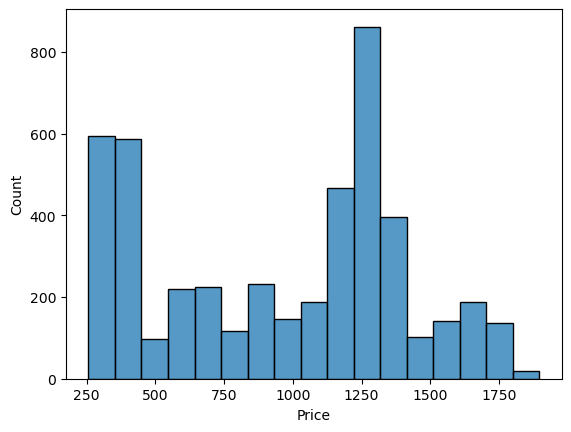

In [11]:
sns.histplot(x='Price', data=df)

### Assign year and price in x and y variables

In [13]:
X = df[['Year']]
y = df['Price']

### Split the data into traning and testin set

We will train our model on the training set and then use the test set to evaluate the model

In [14]:
# import train_test split
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

## Train Data

In [23]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

### Create Linear Regression Model

In [24]:
lr = LinearRegression()

### Train the  model

In [25]:
lr.fit(X_train, y_train)

LinearRegression()

### Check the score of our model

In [26]:
lr.score(X_train, y_train)

0.7055469563729475

### Check the coefficient and Intercept

In [27]:
#print the intercept
lr.intercept_

-140305.14592941053

In [28]:
#print the coefficent
lr.coef_

array([70.28723064])

### Make Prediction with Test data

In [29]:
# Also store the predicted values in a variable
y_pred= lr.predict(X_test)
y_pred

array([ 620.75149695,  901.9004195 , 1393.91103396, 1323.62380332,
        901.9004195 ,  409.88980504, 1323.62380332,  972.18765014,
       1042.47488077,  550.46426632,  972.18765014,  480.17703568,
       1183.04934205, 1393.91103396,  831.61318886, 1604.77272587,
        409.88980504,  409.88980504,  620.75149695,  550.46426632,
       1253.33657268, 1183.04934205, 1464.19826459,  972.18765014,
        550.46426632, 1112.76211141, 1604.77272587,  409.88980504,
       1393.91103396, 1323.62380332, 1604.77272587, 1183.04934205,
       1604.77272587, 1112.76211141,  831.61318886,  761.32595823,
       1534.48549523, 1112.76211141,  480.17703568,  761.32595823,
       1253.33657268,  480.17703568,  480.17703568, 1112.76211141,
       1323.62380332,  409.88980504,  339.60257441,  339.60257441,
       1464.19826459,  339.60257441,  409.88980504,  761.32595823,
        409.88980504, 1534.48549523, 1323.62380332,  620.75149695,
       1183.04934205,  480.17703568,  409.88980504, 1323.62380

In [30]:
y_test

1210     470.70
2029     848.50
3978    1324.80
3728    1106.30
2256    1211.50
         ...   
3700    1153.50
2522    1386.00
43       263.35
2707    1817.00
3392    1254.00
Name: Price, Length: 944, dtype: float64

### Create a new dataframe with actual and predicted values with year(X_test) as index

In [33]:

# Create a new DataFrame with the year as the index
df_new = pd.DataFrame(index=X_test['Year'])

# Add the actual values to the DataFrame
df_new['Actual'] = y_test

# Add the predicted values to the DataFrame
df_new['Predicted'] = y_pred
df_new.head()

,Actual,Predicted
Year,,
2005,NaN,620.751497
2009,NaN,901.900419
2016,839.0,1393.911034
2015,872.5,1323.623803
2009,NaN,901.900419


### Check the mean absolute error, mean square error

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
# Mean absolute error
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
print(mae)
print(mse)

187.15257201098927
59591.68733547794


### Predict the prices for the following years
   * 2025, 2026, 2027, 2028, 2030

In [39]:

# Assuming you have already split your data and trained a model called 'model'

# Create a DataFrame with the years you want to predict
years_to_predict = pd.DataFrame({'Year': [2025, 2026, 2027, 2028, 2030]})

# Use the trained model to predict prices for the given years
predicted_prices = lr.predict(years_to_predict)

# Create a new DataFrame with the predicted prices
predictions_df = pd.DataFrame({'Year': years_to_predict['Year'], 'Predicted_Price': predicted_prices})

# Print the predictions DataFrame
predictions_df


,Year,Predicted_Price
0,2025,2026.496110
1,2026,2096.783340
2,2027,2167.070571
3,2028,2237.357802
4,2030,2377.932263
